In [1]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
#q1
df = pd.read_csv('transaction_anomalies_dataset.csv')

print(df.isnull().sum())

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


In [3]:
print(df.info)

<bound method DataFrame.info of     Transaction_ID  Transaction_Amount  Transaction_Volume  \
0              TX0         1024.835708                   3   
1              TX1         1013.952065                   4   
2              TX2          970.956093                   1   
3              TX3         1040.822254                   2   
4              TX4          998.777241                   1   
..             ...                 ...                 ...   
995          TX995          901.138758                   3   
996          TX996          928.962516                   4   
997          TX997          950.921600                   2   
998          TX998          933.291962                   4   
999          TX999          968.289340                   3   

     Average_Transaction_Amount  Frequency_of_Transactions  \
0                    997.234714                         12   
1                   1020.210306                          7   
2                    989.496604      

In [4]:
print(df.describe())

       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225                     8.361258    13.8199

Text(0, 0.5, 'Frequency')

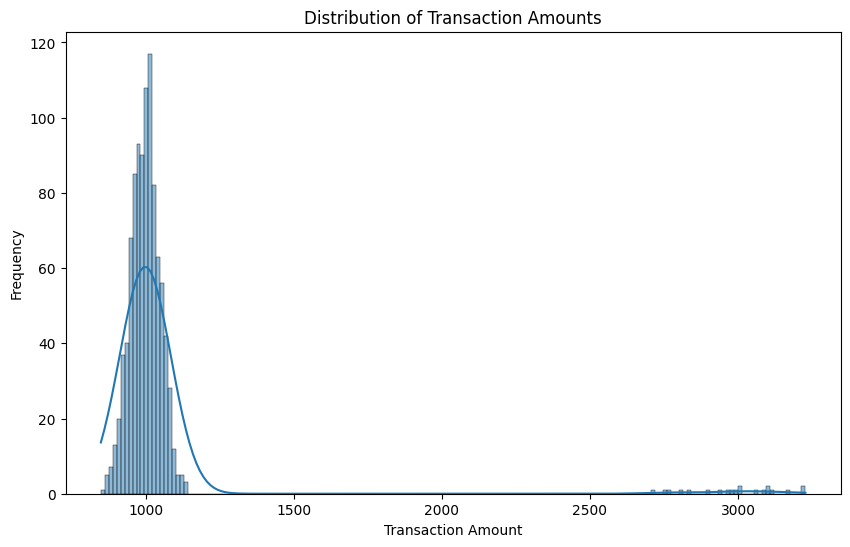

In [5]:
#q2
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')


Text(0, 0.5, 'Transaction_Amount')

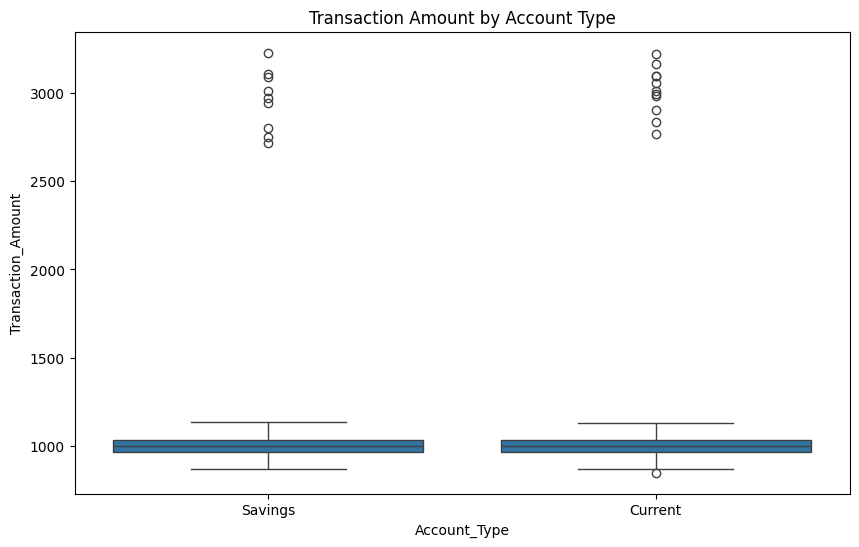

In [6]:
#q3
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Account Type')
plt.xlabel('Account_Type')
plt.ylabel('Transaction_Amount')

Text(0, 0.5, 'Transaction Amount')

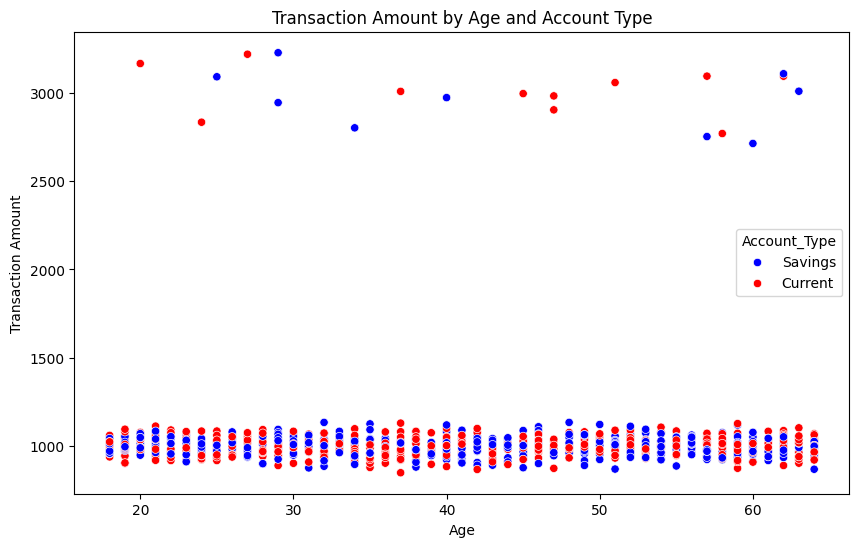

In [7]:
#q4
avg_transaction = df.groupby('Age')['Transaction_Amount'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Transaction_Amount', hue='Account_Type', data=df, palette={'Savings': 'blue', 'Current': 'red'})
plt.title('Transaction Amount by Age and Account Type')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')

Text(0, 0.5, 'Count')

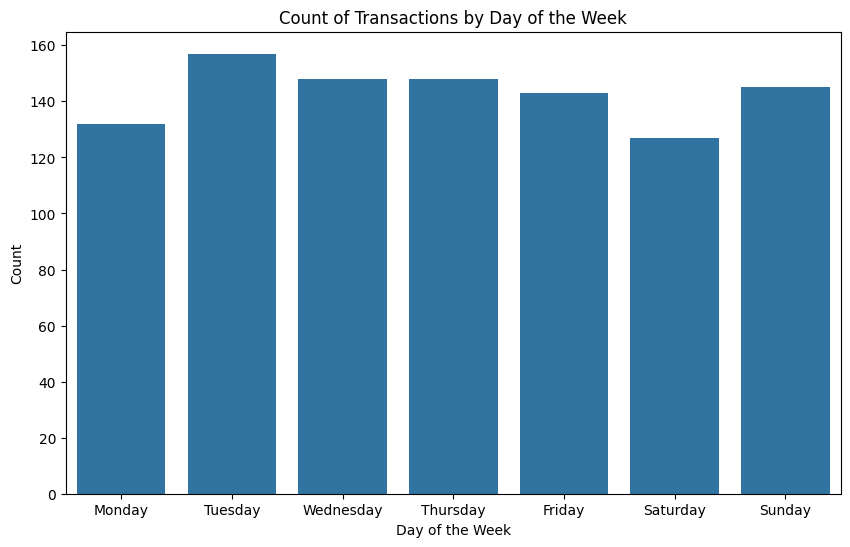

In [8]:
#q5
day_count = df['Day_of_Week'].value_counts().reset_index()
day_count.columns = ['Day_of_Week', 'Count']


plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Count', data=day_count, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

In [9]:

non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index(['Transaction_ID', 'Day_of_Week', 'Time_of_Day', 'Gender',
       'Account_Type'],
      dtype='object')


Index(['Transaction_ID', 'Day_of_Week', 'Time_of_Day', 'Gender',
       'Account_Type'],
      dtype='object')


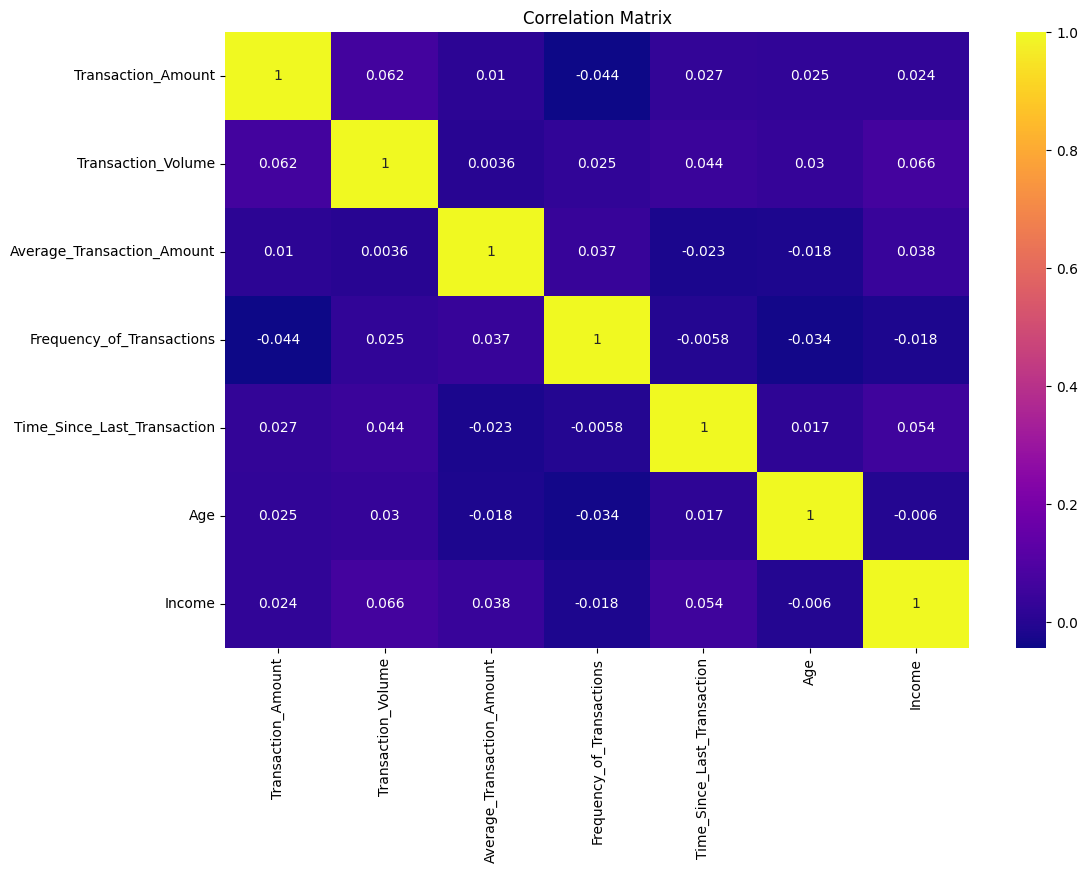

In [10]:
#q6
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)
df_numeric = df.drop(columns=non_numeric_columns)
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()


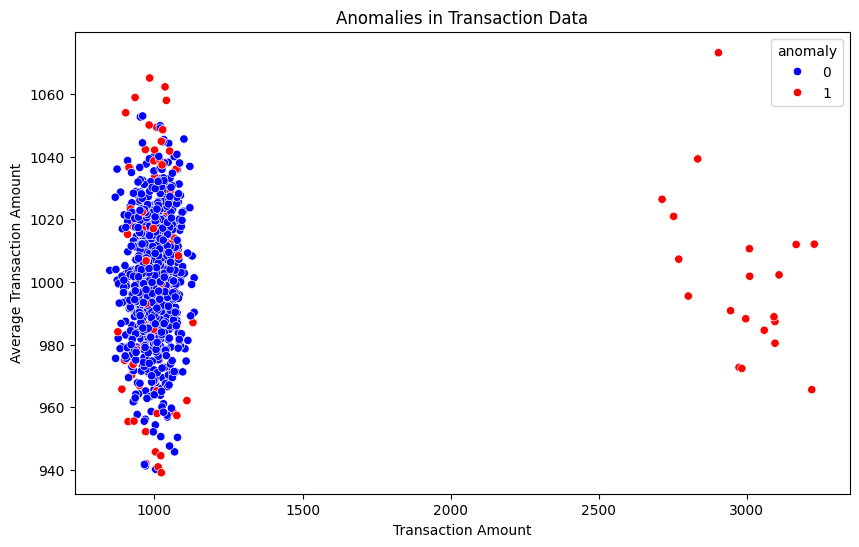

In [11]:
#q7
from sklearn.ensemble import IsolationForest



# Selecting relevant features
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']
X = df[features]

# Fit the model
model = IsolationForest(contamination=0.1)
model.fit(X)

# Predict anomalies
df['anomaly'] = model.predict(X)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', hue='anomaly', data=df, palette=['blue', 'red'])
plt.title('Anomalies in Transaction Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Average Transaction Amount')
plt.show()

In [12]:
#q8
anomalies_count = df['anomaly'].sum()
total_count = df.shape[0]
anomaly_ratio = anomalies_count / total_count

print(f"Number of anomalies: {anomalies_count}")
print(f"Total transactions: {total_count}")
print(f"Anomaly ratio: {anomaly_ratio:.2%}")

Number of anomalies: 100
Total transactions: 1000
Anomaly ratio: 10.00%


In [15]:
#q9
from sklearn.ensemble import IsolationForest

# Select only numerical features for anomaly detection
numerical_features = df[['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
                           'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']]

# Ensure all selected features are numerical
numerical_features = numerical_features.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric data and handle it
if numerical_features.isnull().any().any():
    print("Warning: Some non-numeric values found in the features, these will be filled with zeros.")
    numerical_features.fillna(0, inplace=True)

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
predictions = iso_forest.fit_predict(numerical_features)

# Convert predictions to binary values (1 for normal, -1 for anomaly)
df['anomaly'] = predictions

print("Predictions:\n", df['anomaly'].value_counts())


Predictions:
 anomaly
 1    900
-1    100
Name: count, dtype: int64


In [18]:
#q10
from sklearn.metrics import classification_report


np.random.seed(42)
df['true_anomalies'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])  # 5% anomalies

# Select relevant features
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

# Fit the isolation forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(df[features])

# Get the predictions
df['anomaly'] = model.predict(df[features])
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Generate classification report
true_labels = df['true_anomalies']
predicted_labels = df['anomaly']

report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       954
           1       0.02      0.04      0.03        46

    accuracy                           0.86      1000
   macro avg       0.49      0.47      0.48      1000
weighted avg       0.91      0.86      0.88      1000



In [19]:
#q11
import joblib

# Save the trained model
joblib.dump(model, 'isolation_forest_model.pkl')

['isolation_forest_model.pkl']

In [27]:
new_transaction = {
    'Transaction_Amount': 10000,  
    'Transaction_Volume': 5,  
    'Average_Transaction_Amount': 900, 
    'Frequency_of_Transactions': 6,  
    'Time_Since_Last_Transaction': 2,  
    'Age': 30, 
    'Income': 50000  
}

# Convert the input to a DataFrame
new_transaction_df = pd.DataFrame([new_transaction])

# Predict the anomaly
prediction = model.predict(new_transaction_df)

# Convert the output to binary values (1 for anomaly, 0 for normal)
prediction = 1 if prediction == -1 else 0


if prediction == 1:
    print("The transaction is an anomaly.")
else:
    print("The transaction is normal.")

The transaction is an anomaly.
